In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

### Each row in the attached spreadsheet represents a fund that invests in Alternative Risk Premia, which is a type of investment strategy that is similar to that of Voya’s VERA strategy

In [3]:
data = pd.read_excel('ARP.xlsx')
data = data.iloc[:-2]

### Create another table that looks at Total AUM (AUM is assets under management) – sort the table by AUM (highest to lowest) as of the last reported date (add the last reported date as a field as well since some AUM are not available for March 2022)

In [4]:
aum = data.iloc[:, :21]
aum.columns = aum.columns.str.replace('Product: Total AUM - ','')
aum = aum.replace('---', np.nan)
aum['Last Reported Date'] = np.nan
aum['AUM'] = np.nan
for i in range(len(aum)):
    index=aum.iloc[[i]].transpose().last_valid_index()
    aum.loc[i, 'Last Reported Date']=index
    if index != 'RM':
        aum.loc[i,'AUM'] = aum.loc[i,index]
aum['Last Reported Date']=aum["Last Reported Date"].replace('RM','---')

In [5]:
aum1 = aum[['Firm Name','Product Name','Last Reported Date','AUM']]
aum1.sort_values(by=['AUM'], ascending=False)

,Firm Name,Product Name,Last Reported Date,AUM
24,Man Group,Man Alternative Risk Premia Strategies SP,12/2021,4648.000000
16,GAM Investments,GAM Systematic Alternative Risk Premia (4-8% Vol),03/2020,2618.470000
2,AllianceBernstein L.P.,AB Multi-Strategy Alternative,09/2021,2263.220000
17,GAM Investments,GAM Systematic Alternative Risk Premia Plus (8...,09/2021,1971.000000
18,HSBC Global Asset Management Limited,Multi Asset Style Factors (MASF),03/2022,1378.417579
30,PIMCO,PIMCO Multi-Asset Alternative Risk Premia Fund,03/2022,1282.000000
35,Systematica Investments,Systematica Alternative Risk Premia Fund Limited,03/2022,1254.000000
26,Man Group,Man Diversified Risk Premia SP,12/2021,1168.000000
19,J.P. Morgan Investment Management Inc.,JPM Diversified Risk,03/2022,1019.480000
8,AXA Investment Managers,Chorus Multi Strategy,03/2022,637.930000


### For the strategies that have AUM between 100mm to 1000mm, chart the historical aum as a line chart (x-axis = month/year, y-axis = AUM)

In [6]:
aum2 = aum1.loc[(aum1['AUM']>100) & (aum1['AUM']<1000)]
aum2

,Firm Name,Product Name,Last Reported Date,AUM
1,AllianceBernstein L.P.,AB Event Driven Alternative Risk Premia,12/2021,163.290000
8,AXA Investment Managers,Chorus Multi Strategy,03/2022,637.930000
20,LFIS Capital,LFIS Vision - Premia Opportunities,03/2022,180.605348
21,LFIS Capital,LFIS Vision UCITS - Premia,03/2022,211.370121
22,Lombard Odier Investment Managers,Commodities Risk Premia,06/2021,153.040000
25,Man Group,Man Alternative Style Risk Premia (UCITS),12/2021,484.000000
27,Metzler Asset Management GmbH,Metzler Alternative Multi Strategy,03/2022,165.106133
28,Neuberger Berman Group LLC,"NB Breton Hill Multi-Style Premia Master Fund, LP",09/2020,365.600000
31,PIMCO,PIMCO Multi-Asset Alternative Risk Premia Stra...,03/2022,177.000000
32,Quoniam Asset Management GmbH,Global Risk Premia,12/2020,368.288550


In [7]:
import matplotlib.pyplot as plt

In [8]:
def LineChart(index):
    name = aum.iloc[index, 0]
    historical_data = aum.iloc[index, 4:21]
    historical_data.plot(title=name, figsize=(8,5))
    plt.xlabel('Month/Year')
    plt.ylabel('AUM')
    plt.show()

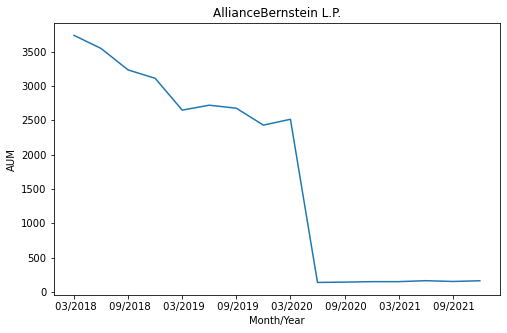

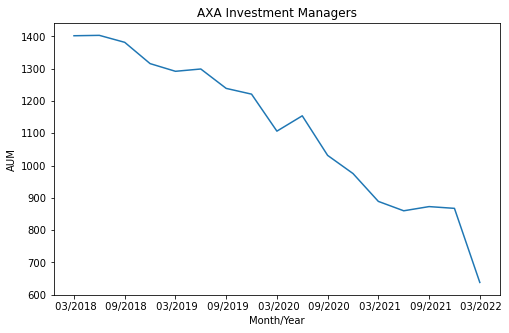

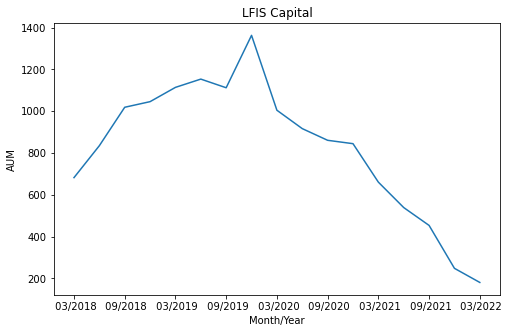

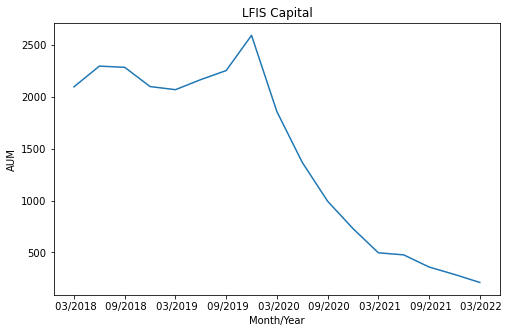

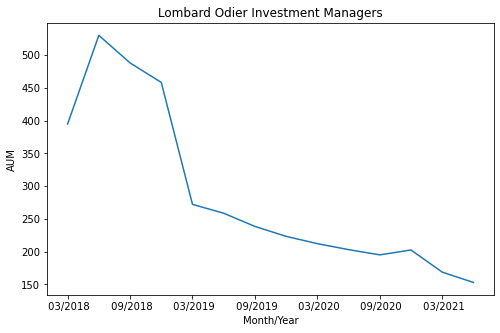

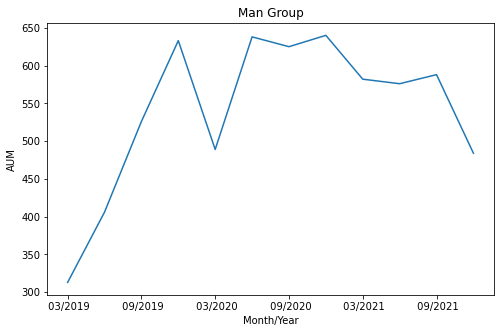

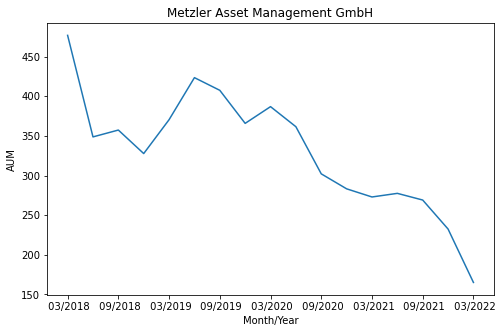

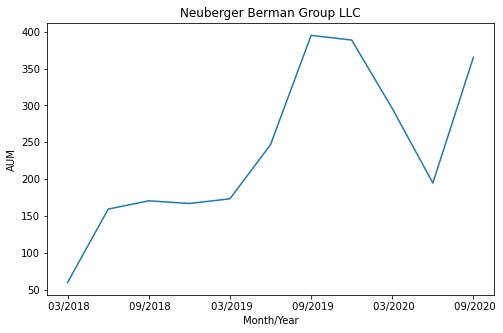

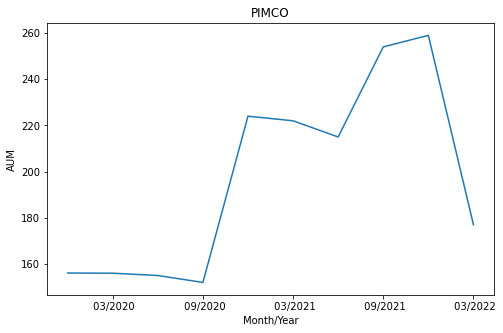

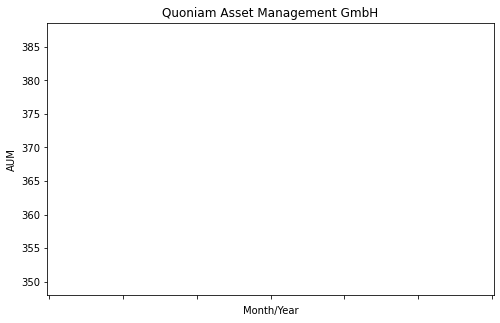

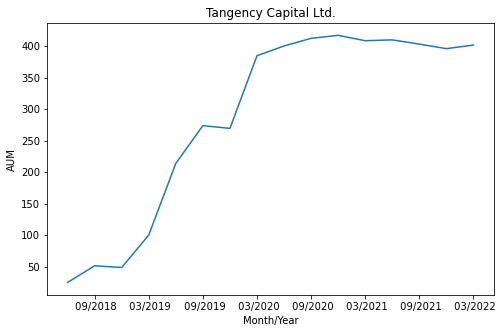

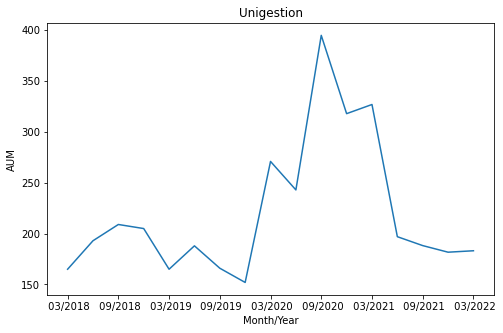

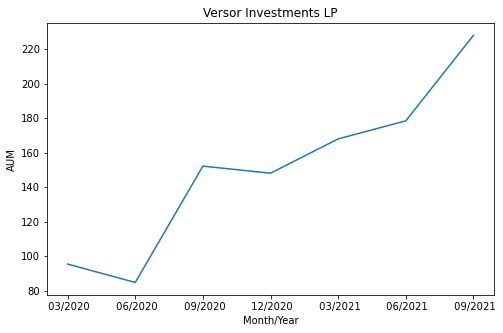

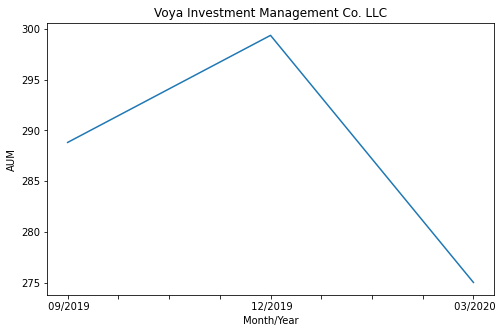

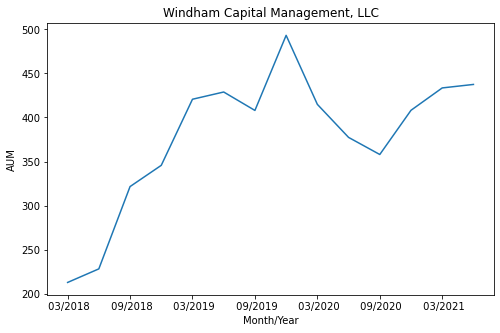

In [9]:
for i in aum2.index:
    LineChart(i)

## RET

In [10]:
return_ = data.drop(data.columns[2:21], axis=1)
return_ = return_.replace('---', 0)
return_.columns = return_.columns.str.replace("Returns - ",'')

### Total Return Index and Line Charts

In [11]:
r = return_.iloc[:,57:]
r.columns = r.columns.str[1:8]
r = r/100

In [12]:
index = pd.DataFrame()
index['Firm Name'] = return_['Firm Name']
index['Product Name'] = return_['Product Name']
index['01/2019'] = 100

In [13]:
for date in r.columns:
    index[date] = index.iloc[:,-1]*(1+r[date])

In [14]:
index.head()

,Firm Name,Product Name,01/2019,02/2019,03/2019,04/2019,05/2019,06/2019,07/2019,08/2019,...,08/2021,09/2021,10/2021,11/2021,12/2021,01/2022,02/2022,03/2022,04/2022,05/2022
0,abrdn (Aberdeen),Alternative Risk Premia,100,100.0000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,AllianceBernstein L.P.,AB Event Driven Alternative Risk Premia,100,101.4838,101.428897,101.908453,99.740147,101.598406,100.770277,99.054260,...,100.585243,100.443317,100.493036,101.217089,101.863056,101.160608,101.246898,101.667377,101.667377,101.667377
2,AllianceBernstein L.P.,AB Multi-Strategy Alternative,100,100.4535,101.417954,101.166945,101.410858,102.675959,102.876485,102.539873,...,107.959931,106.375619,106.902922,106.448371,108.150268,106.242173,104.568752,106.362629,106.362629,106.362629
3,Allianz Global Investors,AllianzGI Multi Asset Risk Premia,100,99.8533,102.921492,104.711503,102.736749,104.006883,107.133954,105.625722,...,108.865368,111.968466,110.335966,106.207636,105.891349,107.701774,106.369395,105.801489,105.801489,105.801489
4,AQR Capital Management LLC,AQR Liquid Enhanced Alternative Premia,100,100.6719,100.662135,99.529082,98.702095,98.728152,98.990868,98.863961,...,78.355881,79.908581,74.997560,74.486976,83.051712,97.307622,97.307622,97.307622,97.307622,97.307622


In [13]:
# index.to_excel('Index.xlsx')

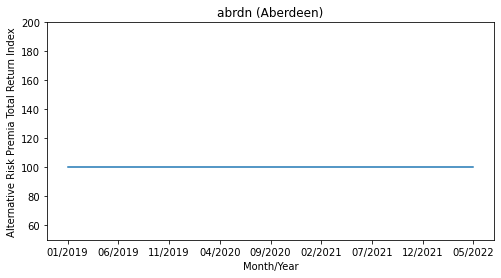

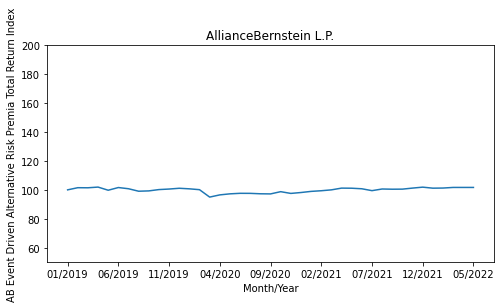

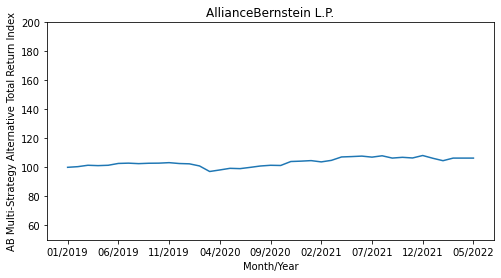

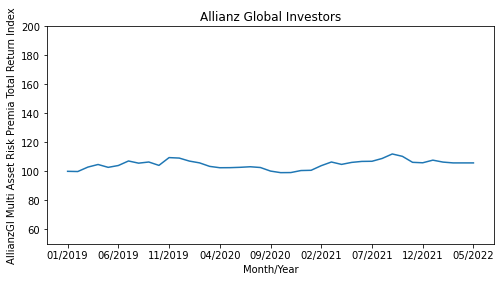

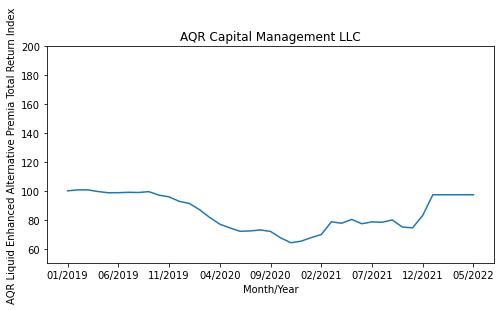

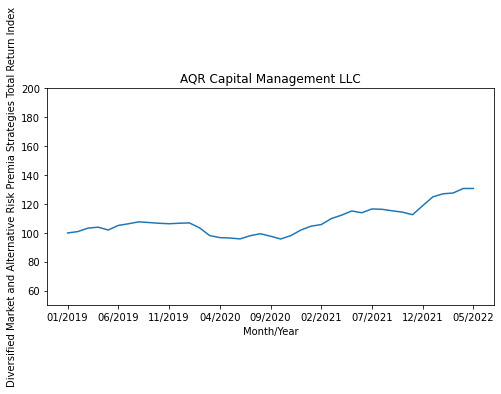

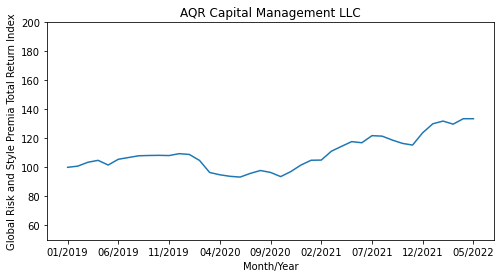

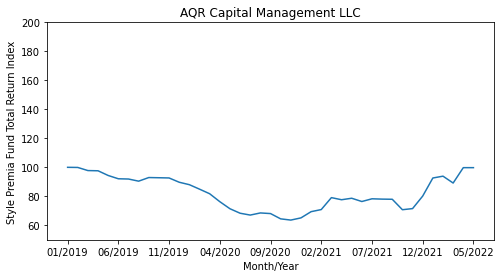

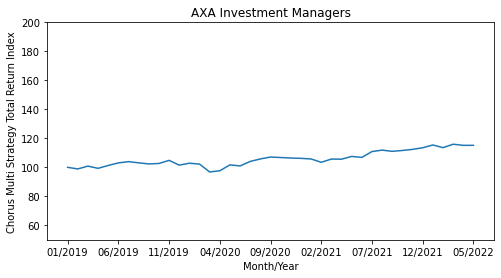

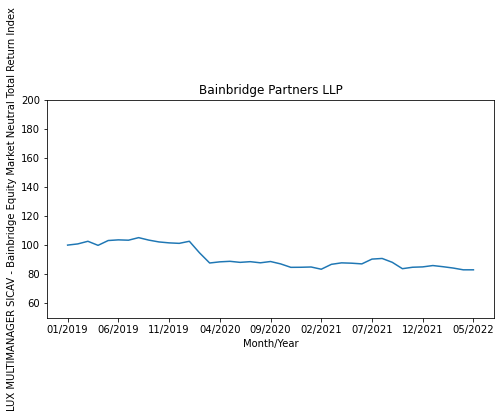

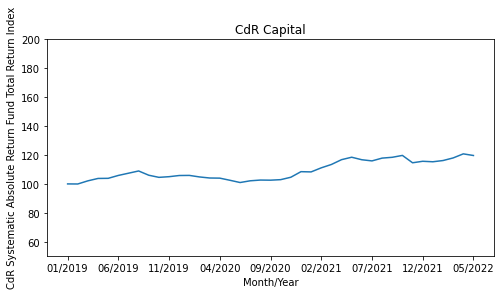

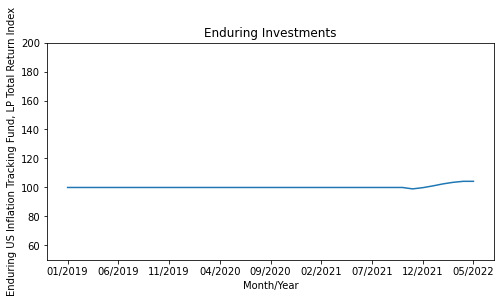

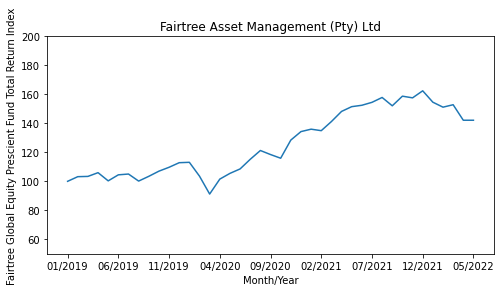

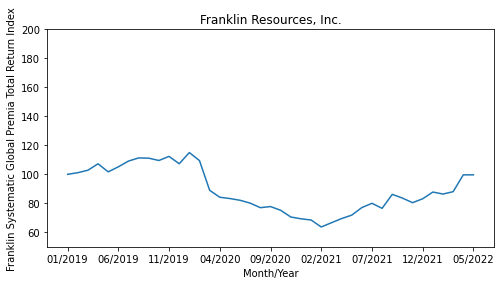

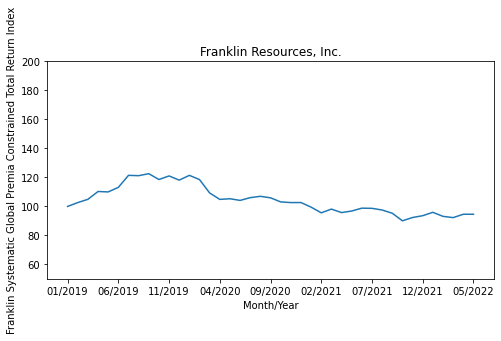

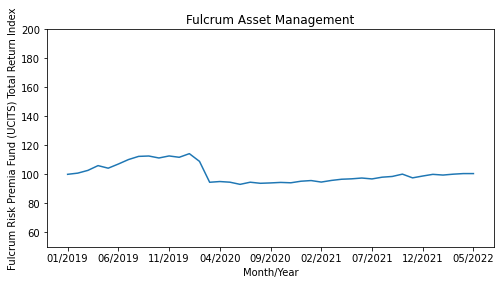

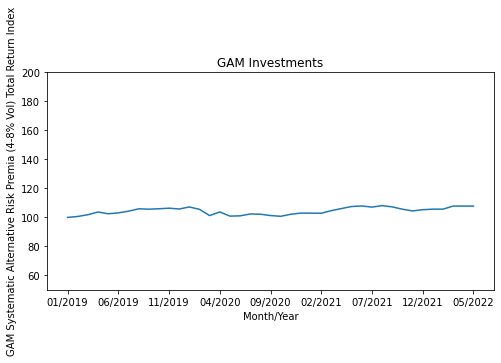

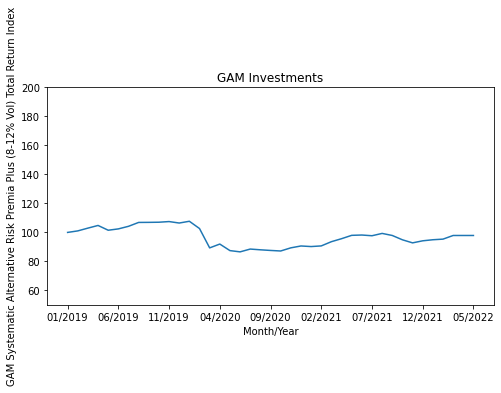

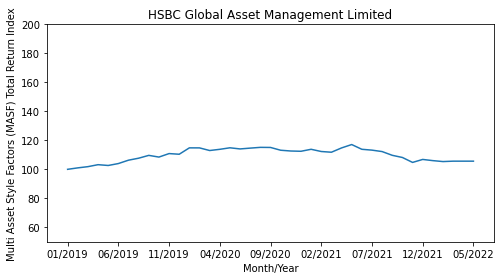

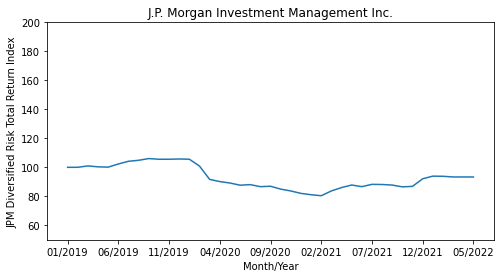

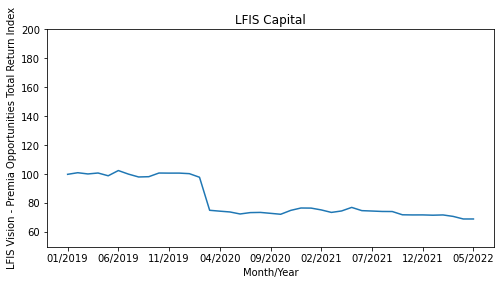

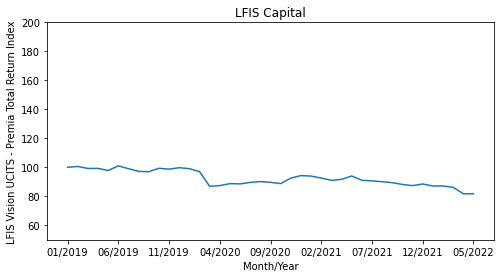

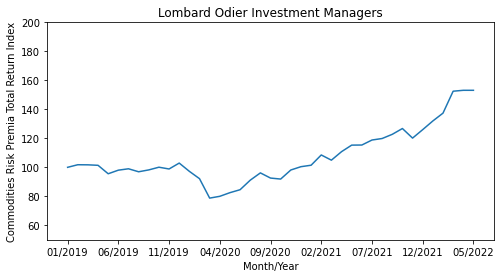

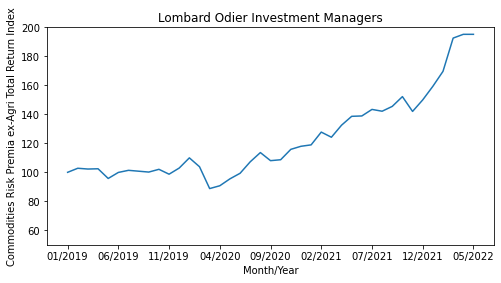

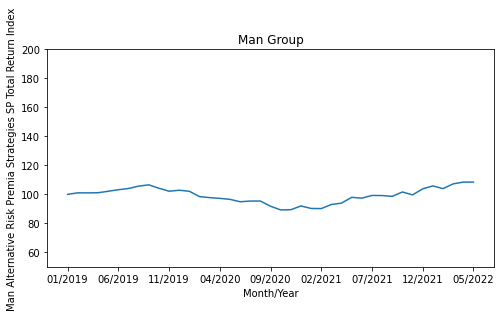

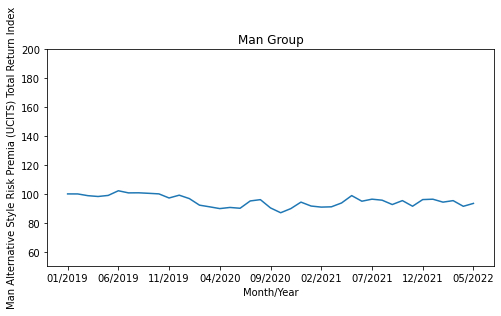

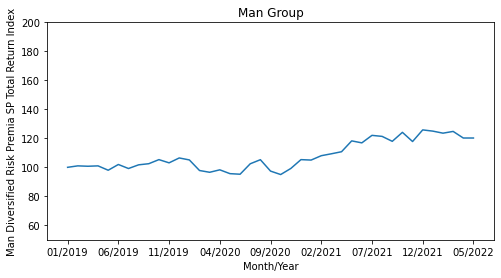

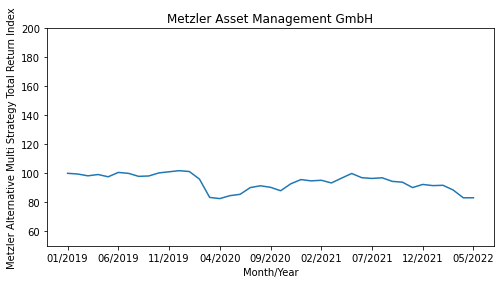

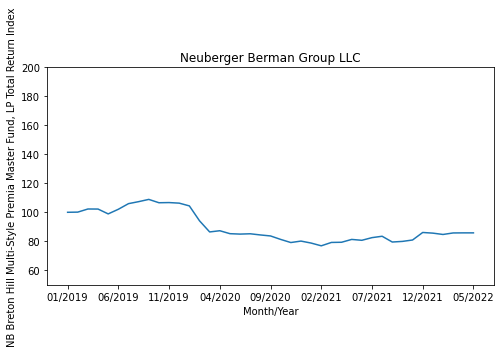

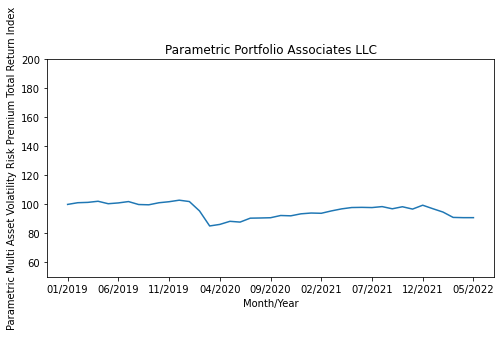

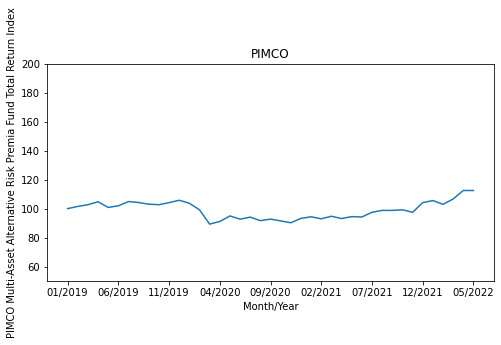

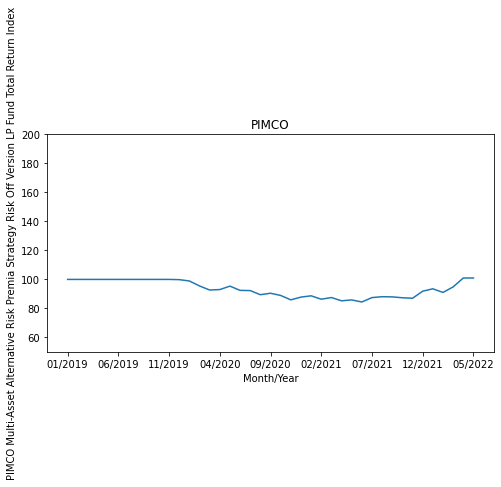

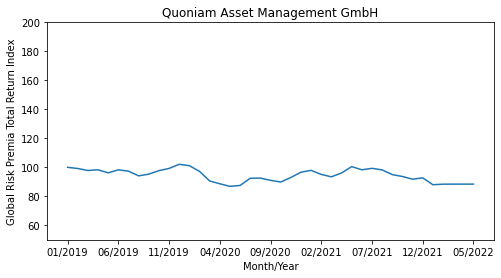

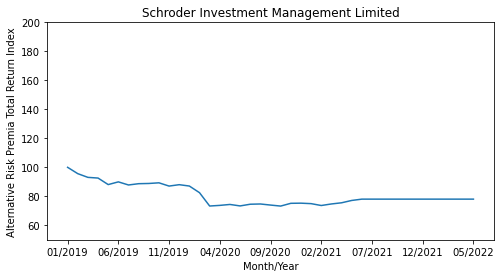

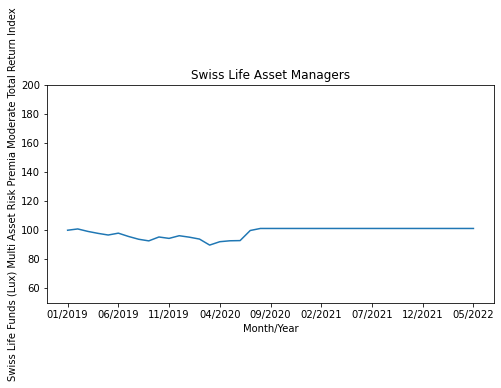

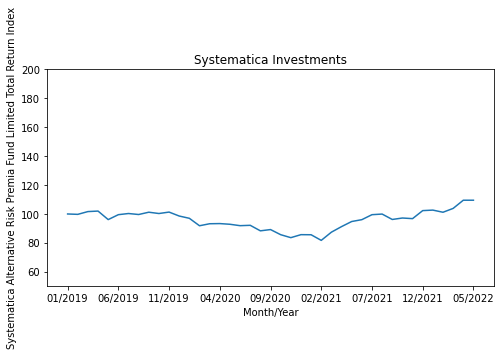

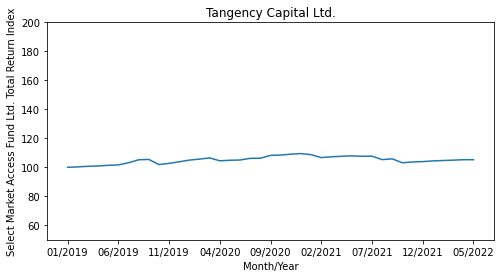

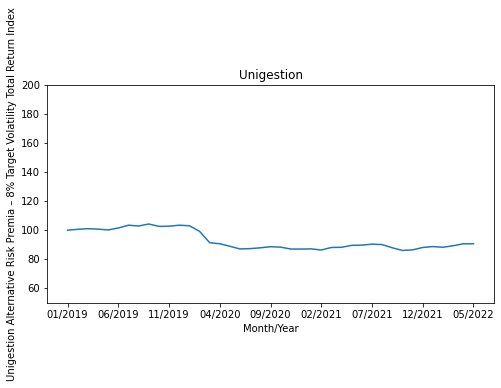

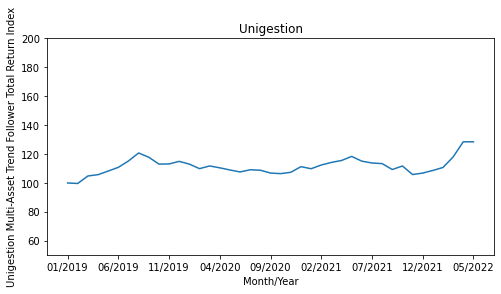

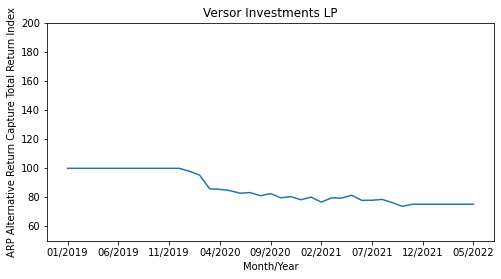

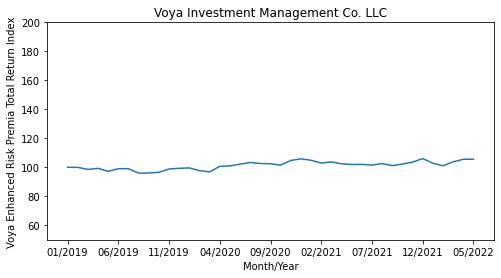

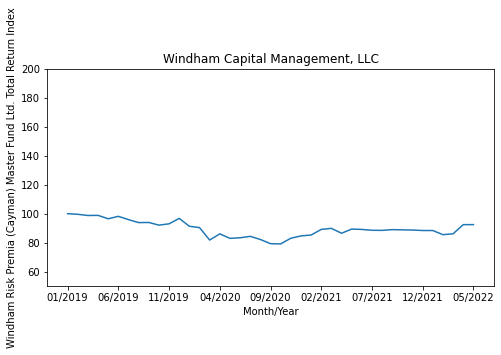

In [15]:
for i in range(42):
    name = index.iloc[i, 0]
    pro = index.iloc[i, 1] + " Total Return Index"
    his_data = index.iloc[i, 2:]
    his_data.plot(title=name, figsize=(8,4), ylim=(50,200))
    plt.xlabel('Month/Year')
    plt.ylabel(pro)
    plt.show()

### Calculate the compounded return over YTD, 1Y, 3Y, 2021, 2020, 2019 periods for each of the strategies 

In [16]:
ret=pd.DataFrame()
ret['Firm Name'] = return_['Firm Name']
ret['Product Name'] = return_['Product Name']

In [17]:
# YTD
cum22 = np.cumprod((1+return_.iloc[:,-5:]/100), axis=1)-1
ret['YTD'] = cum22.iloc[:, -1:]

In [18]:
#2021
cum21 = np.cumprod((1+return_.iloc[:,-17:-5]/100), axis=1)-1
ret['2021'] = cum21.iloc[:, -1:]

In [19]:
#2020
cum20 = np.cumprod((1+return_.iloc[:,-29:-17]/100), axis=1)-1
ret['2020'] = cum20.iloc[:, -1:]

In [20]:
#2019
cum19 = np.cumprod((1+return_.iloc[:,-41:-29]/100), axis=1)-1
ret['2019'] = cum19.iloc[:, -1:]

In [21]:
ret = ret[['Firm Name', 'Product Name', '2019', '2020', '2021', 'YTD']]

In [22]:
ret['1Y'] = np.nan
ret['3Y'] = np.nan
ret['Start Date'] = np.nan
ret['End Date'] = np.nan
ret['3Y Annual'] = np.nan

In [23]:
df = return_.copy()
df = df.replace(0, np.nan)

In [24]:
for i in df.index:
    d = df.iloc[[i],2:]
    d = d.dropna(axis=1)
    if len(d.columns) >= 12:
        c1 = np.prod(1+d.iloc[:, -12:]/100, axis=1)-1
        ret.loc[[i],'1Y'] = c1
    if len(d.columns) >= 36:
        l = d.iloc[:,-36:].columns.tolist()
        c2 = np.prod(1+d.iloc[:, -36:]/100, axis=1)-1
        ret.loc[[i],'3Y'] = c2
        ret.loc[[i],'Start Date'] = l[0][1:8]
        ret.loc[[i],'End Date'] = l[-1][1:8]

### Annualized returns for the 3Y period. Also, indicate the start date and end date used 

In [25]:
ret['3Y Annual'] = (ret['3Y'] + 1)**(1./3) - 1
ret.head()

,Firm Name,Product Name,2019,2020,2021,YTD,1Y,3Y,Start Date,End Date,3Y Annual
0,abrdn (Aberdeen),Alternative Risk Premia,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
1,AllianceBernstein L.P.,AB Event Driven Alternative Risk Premia,0.031799,-0.029035,0.037734,-0.001921,0.016695,0.002351,04/2019,03/2022,0.000783
2,AllianceBernstein L.P.,AB Multi-Strategy Alternative,0.042144,0.015971,0.037313,-0.016529,0.014918,0.048755,04/2019,03/2022,0.015995
3,Allianz Global Investors,AllianzGI Multi Asset Risk Premia,0.084106,-0.078831,0.053246,-0.000849,-0.005864,0.027982,04/2019,03/2022,0.009242
4,AQR Capital Management LLC,AQR Liquid Enhanced Alternative Premia,-0.058972,-0.296491,0.272654,0.171651,0.436951,-0.026924,02/2019,01/2022,-0.009056


In [26]:
# ret.to_excel('ret.xlsx')